# Adetutu B Exploratory Analysis

## General Setup/Additional Data Checking

In [3]:
#Importing python libraries
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

#Loading the medical data csv without the index column
df = pd.read_csv('./medical_clean.csv', index_col=0)

#Checking database information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [4]:
#Fixing the columns with names I assigned in D206 to fit python casing rules
updated_names = {
    'CaseOrder': 'case_order',
    'Customer_id': 'customer_id',
    'Interaction': 'interaction',
    'UID': 'uid',
    'City': 'city',
    'State': 'state',
    'County': 'county',
    'Zip': 'zip_code',
    'Lat': 'latitude',
    'Lng': 'longitude',
    'Population': 'population',
    'Area': 'area_type',
    'Timezone': 'timezone',
    'Job': 'job_title',
    'Children': 'children',
    'Age': 'age',
    'Education': 'highest_education',
    'Employment': 'employment_status',
    'Income': 'income',
    'Marital': 'marital_status',
    'Gender': 'gender',
    'ReAdmis': 'readmission',
    'VitD_levels': 'vitamin_d_level',
    'Doc_visits': 'doctor_visits',
    'Full_meals_eaten': 'full_meals_eaten',
    'VitD_supp': 'vitamin_d_supplements',
    'Soft_drink': 'soft_drink',
    'Initial_admin': 'initial_admit_type',
    'HighBlood': 'high_bp',
    'Stroke': 'stroke',
    'Complication_risk': 'complication_risk',
    'Overweight': 'overweight',
    'Arthritis': 'arthritis',
    'Diabetes': 'diabetes',
    'Hyperlipidemia': 'hyperlipidemia',
    'BackPain': 'back_pain',
    'Anxiety': 'anxiety',
    'Allergic_rhinitis': 'allergic_rhinitis',
    'Reflux_esophagitis': 'reflux_esophagitis',
    'Asthma': 'asthma',
    'Services': 'services',
    'Initial_days': 'initial_stay',
    'TotalCharge': 'daily_charge',
    'Additional_charges': 'additional_charge',
    'Item1': 'srv1_timely_admission',
    'Item2': 'srv2_timely_treatment',
    'Item3': 'srv3_timely_visits',
    'Item4': 'srv4_reliability',
    'Item5': 'srv5_options',
    'Item6': 'srv6_treatment_hours',
    'Item7': 'srv7_courteous_staff',
    'Item8': 'srv8_doctor_listening'}
df.rename(columns=updated_names, inplace=True)

#Changing column type to category
df['initial_admit_type'] = df['initial_admit_type'].astype('category')

#Visually inspecting the dataframe
pd.set_option("display.max_columns", None)
df

,customer_id,interaction,uid,city,state,county,zip_code,latitude,longitude,population,area_type,TimeZone,job_title,children,age,income,marital_status,gender,readmission,vitamin_d_level,doctor_visits,full_meals_eaten,vitD_supp,soft_drink,initial_admit_type,high_bp,stroke,complication_risk,overweight,arthritis,diabetes,hyperlipidemia,back_pain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,services,initial_stay,daily_charge,additional_charge,srv1_timely_admission,srv2_timely_treatment,srv3_timely_visits,srv4_reliability,srv5_options,srv6_treatment_hours,srv7_courteous_staff,srv8_doctor_listening
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",2,25,45967.61,Widowed,Male,No,16.980860,4,2,1,No,Emergency Admission,Yes,No,Medium,No,No,No,No,No,Yes,No,Yes,No,Intravenous,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4,87,14983.02,Widowed,Male,Yes,18.177020,5,0,0,No,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3,45,65917.81,Separated,Female,Yes,17.129070,4,2,0,Yes,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2


## B1 & B2: Dataset Code & Chi-Squared Test Output Results

In [5]:
#Making a contingency table
cont_table = pd.crosstab(df.readmission, df.initial_admit_type, margins=True, margins_name='subtotal')

cont_table

initial_admit_type,Elective Admission,Emergency Admission,Observation Admission,subtotal
readmission,,,,
No,1608,3156,1567,6331
Yes,896,1904,869,3669
subtotal,2504,5060,2436,10000


In [6]:
#Performing our chi-square test
chi2, p_value, dof, expected = chi2_contingency(cont_table)

In [7]:
#Resulting chi-square statistic
chi2

3.8899679903336484

In [8]:
#Found p value
p_value

0.6915638217151139

In [9]:
#Found degrees of freedom
dof

6

In [10]:
#Expected frequencies for each contingency table cell 
expected

array([[ 1585.2824,  3203.486 ,  1542.2316,  6331.    ],
       [  918.7176,  1856.514 ,   893.7684,  3669.    ],
       [ 2504.    ,  5060.    ,  2436.    , 10000.    ]])

In [11]:
#Interptreting the p value
alpha = 0.05

if p_value < alpha:
    print(f"Reject the null hypothesis: There is a statistically significant relationship between readmission and a patient's intial admission type.")
else:
    print(f"Fail to reject the null hypothesis: There is not a statistically significant relationship between readmission and a patient's initial admission type.")

Fail to reject the null hypothesis: There is not a statistically significant relationship between readmission and a patient's initial admission type.


## C: Univariate Statistics


In [12]:
#Categorical variable distribution
df.initial_admit_type.value_counts()

initial_admit_type
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [13]:
#Categorical variable distribution
df.services.value_counts()

services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

In [14]:
#Continuous variable distribution
df.daily_charge.describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: daily_charge, dtype: float64

In [15]:
#Continuous variable distribution
df.vitamin_d_level.describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: vitamin_d_level, dtype: float64

## C1: Univariate Visualization

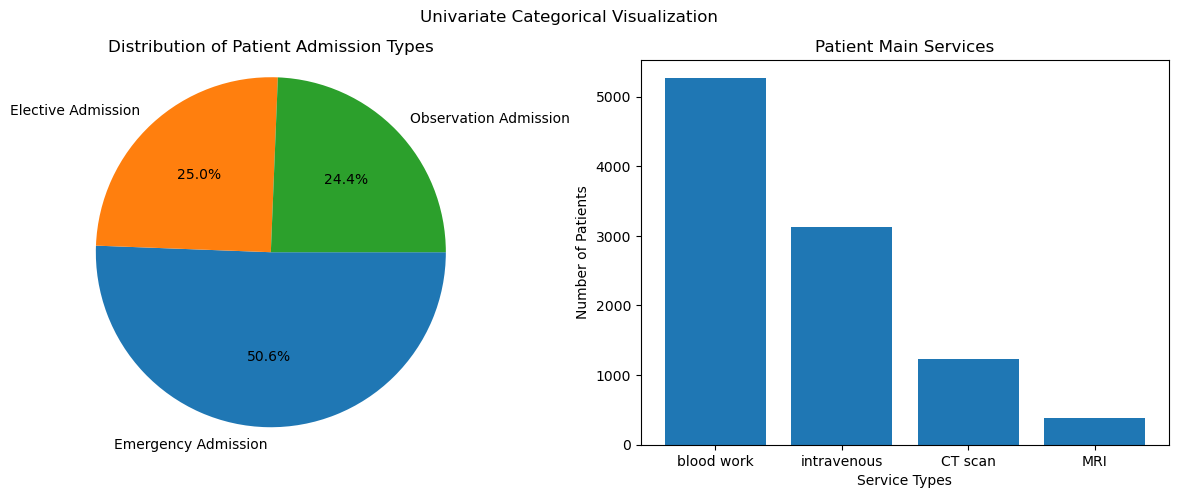

In [16]:
plt.figure(figsize = [15,5])
plt.suptitle('Univariate Categorical Visualization')

#Pie chart explortion of the categorical variable initial_admit_type [In-text citation: (Matplotlib 3.9.2 documentation, n.d.)]
plt.subplot(1, 2, 1)
plt.title('Distribution of Patient Admission Types')
admit_type_counts = df['initial_admit_type'].value_counts()
admit_type_labels = ['Emergency Admission', 'Elective Admission', 'Observation Admission']
plt.pie(admit_type_counts, labels=admit_type_counts.index, autopct='%1.1f%%', counterclock = False)
plt.axis('square');

#Bar Chart exploration of the categorical variable services
plt.subplot(1, 2, 2)
plt.title('Patient Main Services')
service_type_counts = df['services'].value_counts()
service_type_labels = ['blood work', 'intravenous', 'CT scan', 'MRI']
plt.bar(service_type_counts.index, service_type_counts.values)
plt.xlabel('Service Types')
plt.ylabel('Number of Patients')
plt.xticks(ticks=range(len(service_type_labels)), labels=service_type_labels);

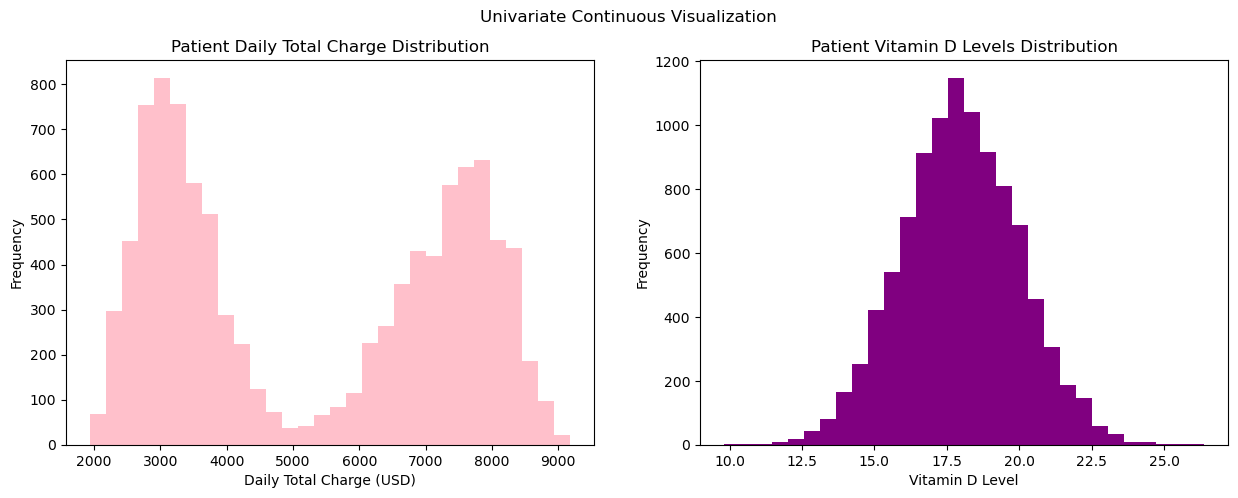

In [17]:
plt.figure(figsize = [15,5])
plt.suptitle('Univariate Continuous Visualization')

#Histogram exploration of the continuous variable Total Charge
plt.subplot(1, 2, 1)
plt.title('Patient Daily Total Charge Distribution')
plt.hist(data=df, x='daily_charge', bins=30, color='pink')
plt.xlabel('Daily Total Charge (USD)')
plt.ylabel('Frequency');

#Histogram exploration of the continuous variable Vitamin D Levels
plt.subplot(1, 2, 2)
plt.title('Patient Vitamin D Levels Distribution')
plt.hist(data=df, x='vitamin_d_level', bins=30, color='purple')
plt.xlabel('Vitamin D Level')
plt.ylabel('Frequency');

## D: Bivariate Statistics


In [18]:
#Categorical variable distribution - will be used to show the relationship with income (a continuous variable)
df.area_type.value_counts()

area_type
Rural       3369
Suburban    3328
Urban       3303
Name: count, dtype: int64

In [19]:
#Continuous variable distribution - will be used to show the relationship with Area (a categorical variable)
df.income.describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: income, dtype: float64

In [20]:
#Categorical variable distribution - will be used to show the relationship with additional charge (a continuous variable)
df.initial_admit_type.value_counts()

initial_admit_type
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [21]:
#Continuous variable distribution - will be used to show the relationship with initial admit type (a categorical variable)
df.additional_charge.describe()

count    10000.000000
mean     12934.528587
std       6542.601544
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      30566.070000
Name: additional_charge, dtype: float64

## D1: Bivariate Visualization


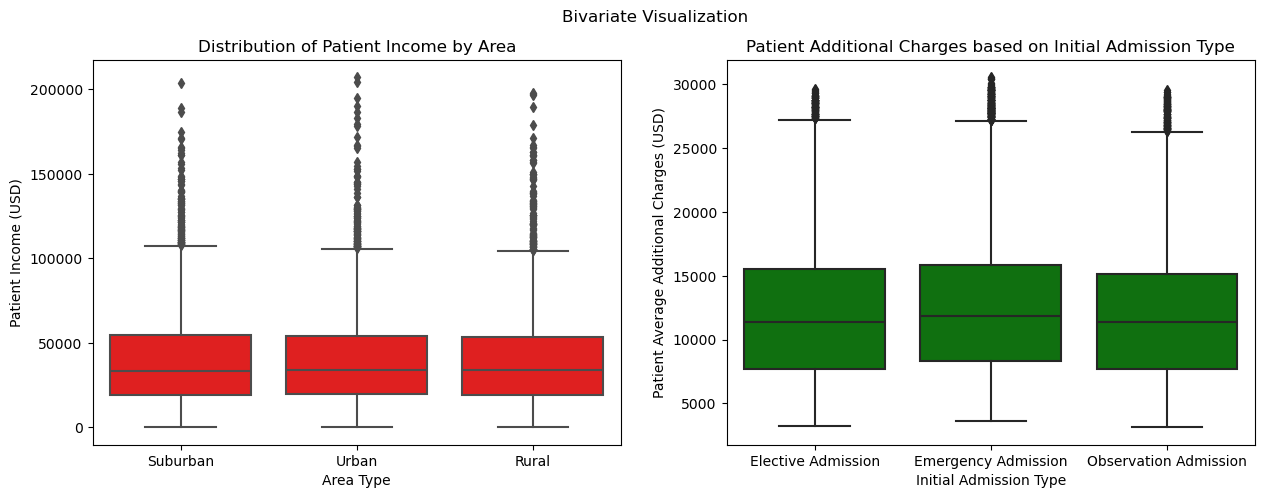

In [22]:
#Ignoring FutureWarning related to 'observed' parameter for a future pandas version update
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

plt.figure(figsize = [15,5])
plt.suptitle('Bivariate Visualization')

#Bivariate Boxplot exploration of area_type (categorical) & income (continuous)
plt.subplot(1, 2, 1)
plt.title('Distribution of Patient Income by Area')
sns.boxplot(data=df, x='area_type', y='income', color='red')
plt.xlabel('Area Type')
plt.ylabel('Patient Income (USD)');

#Bivariate Boxplot exploration of initial_admit_type (categorical) & additional_charge (continuous)
plt.subplot(1, 2, 2)
plt.title('Patient Additional Charges based on Initial Admission Type')
sns.boxplot(data=df, x='initial_admit_type', y='additional_charge', color='green')
plt.xlabel('Initial Admission Type')
plt.ylabel('Patient Average Additional Charges (USD)');